In [107]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


In [85]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *


# Load data
df = pd.read_csv('data/pulsar_data_train.csv')

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12528  │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 9      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │  Mean of the       │    0 │     0 │     111 │  25.67 │  5.812 │   100.9 │  115.2 │  127.1 │ 189.7 │   ▂▇▃  │  │
│ │ integrated profile │      │       │         │        │        │         │        │        │       │        │  │
│ │  Standard          │    0 │     0 │   46.52 │  6.801 │  24.77 │   42.36 │  46.93 │  50.98 │ 91.81 │  ▁▇▇   │  │
│ │ deviation of the   │      │       │         │        │        │         │        │        │       │        │  │
│ │ integrated profile │      │       │         │        │        │         │        │        │       │        │  │
│ │  Excess kurtosis   │ 1735 │ 13.85 │  0.4785 │  1.065 │ -1.738 │ 0.02465 │ 0.2237 │ 0.4731 │  8.07 │   ▁▇   │  │
│ │ of the integrated  │      │       │         │        │        │         │        │        │       │        │  │
│ │ profile            │      │       │         │        │        │         │        │        │       │        │  │
│ │  Skewness of the   │    0 │     0 │   1.778 │  6.208 │ -1.792 │ -0.1881 │ 0.2033 │ 0.9324 │  68.1 │   ▇    │  │
│ │ integrated profile │      │       │         │        │        │         │        │        │       │        │  │
│ │  Mean of the       │    0 │     0 │   12.67 │  29.61 │ 0.2132 │   1.911 │  2.793 │  5.413 │ 222.4 │   ▇    │  │
│ │ DM-SNR curve       │      │       │         │        │        │         │        │        │       │        │  │
│ │  Standard          │ 1178 │   9.4 │   26.35 │  19.61 │   7.37 │    14.4 │  18.41 │  28.34 │ 110.6 │  ▇▂▁▁  │  │
│ │ deviation of the   │      │       │         │        │        │         │        │        │       │        │  │
│ │ DM-SNR curve       │      │       │         │        │        │         │        │        │       │        │  │
│ │  Excess kurtosis   │    0 │     0 │   8.333 │  4.536 │ -3.139 │   5.803 │  8.451 │  10.73 │ 34.54 │  ▂▇▅▁  │  │
│ │ of the DM-SNR      │      │       │         │        │        │         │        │        │       │        │  │
│ │ curve              │      │       │         │        │        │         │        │        │       │        │  │
│ │  Skewness of the   │  625 │  4.99 │   105.5 │  107.4 │ -1.977 │    35.2 │  83.13 │    140 │  1191 │   ▇▁   │  │
│ │ DM-SNR curve       │      │       │         │        │        │         │        │        │       │        │  │
│ │ target_class       │    0 │     0 │ 0.09203 │ 0.2891 │      0 │       0 │      0 │      0 │     1 │ ▇    ▁ │  │
│ └────────────────────┴──────┴───────┴─────────┴────────┴────────┴─────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── 

In [86]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB
None


 Mean of the integrated profile                  [121.15625, 76.96875, 130.5859375, 156.3984375...
 Standard deviation of the integrated profile    [48.37297113, 36.17555664, 53.22953353, 48.865...
 Excess kurtosis of the integrated profile       [0.375484665, 0.71289786, 0.133408289, -0.2159...
 Skewness of the integrated profile              [-0.0131654889999999, 3.3887185630000003, -0.2...
 Mean of the DM-SNR curve                        [3.168896321, 2.399665552, 2.743311037, 17.471...
 Standard deviation of the DM-SNR curve          [18.399366600000004, 17.57099693, 22.36255299,...
 Excess kurtosis of the DM-SNR curve             [7.449874148999999, 9.414652256, 8.508363784, ...
 Skewness of the DM-SNR curve                    [65.15929771, 102.7229747, 74.03132420000001, ...
target_class                                                                            [0.0, 1.0]
dtype: object

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

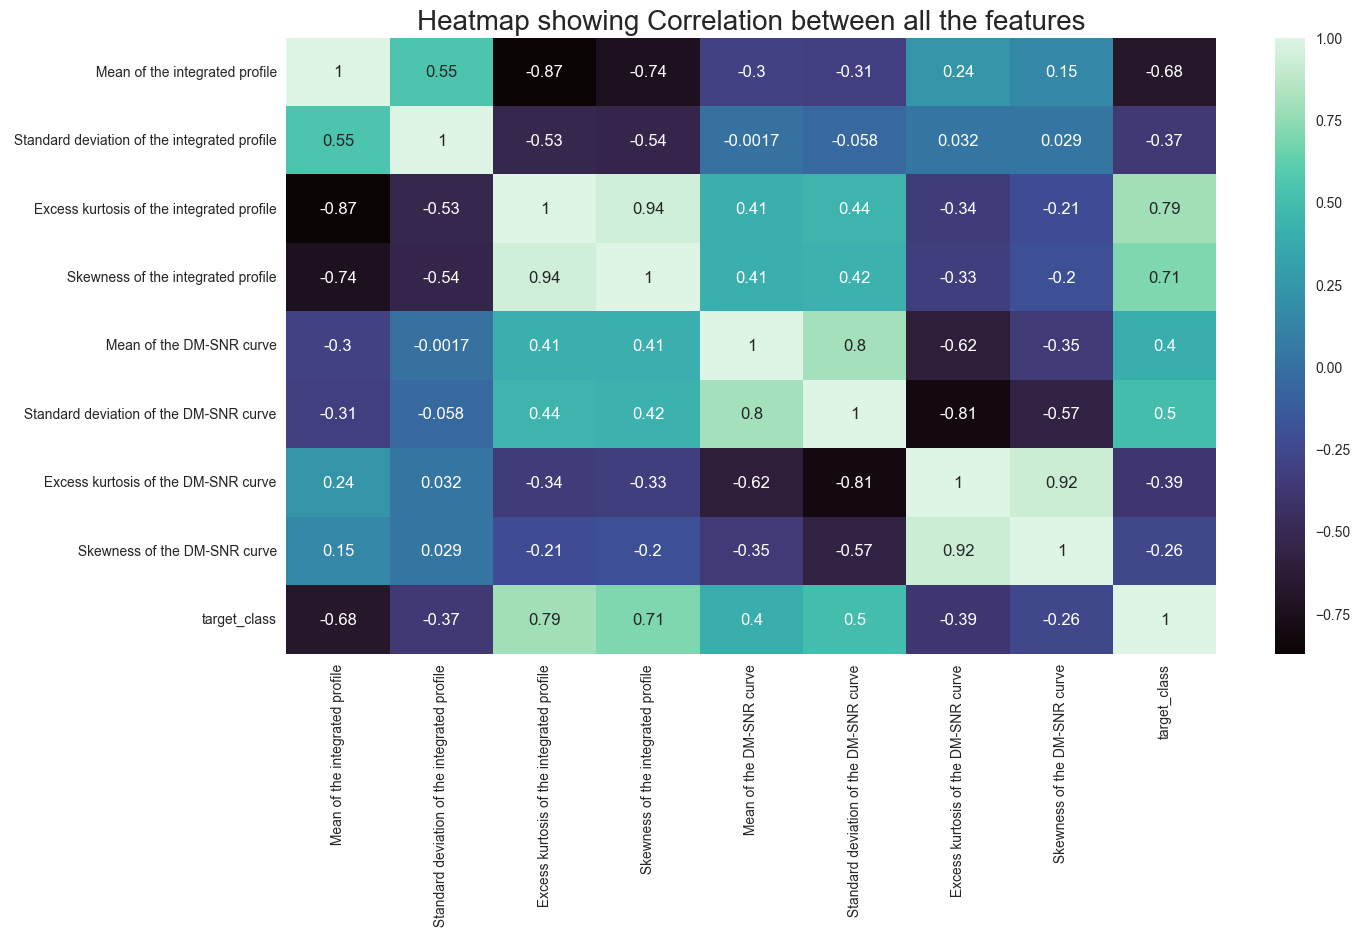

In [87]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako') #coolwarm

In [97]:
df.columns = df.columns.str.strip().str.replace('\xa0', ' ').str.replace('\u200b', '')
df.columns = df.columns.str.translate(str.maketrans('', '', '\t\n\r\x0b\x0c'))
df.columns = df.columns.str.replace(r'\s+', '')


df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [96]:
df.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

In [91]:
#   #Imputer        #Use Case               #Encoding   #Type               #Strategy
#   SimpleImputer   Numerical missing       values      No encoding         Mean, median, most frequent, constant
#   KNNImputer      Numerical missing       values      No encoding         Mean or median of nearest neighbors
#   OrdinalEncoder  Ordinal categorical     variables	Ordinal encoding	Integer values based on order
#   OneHotEncoder   Nominal categorical     variables	One-hot encoding	Binary features
#   LabelEncoder    Nominal categorical     variables   Label encoding      Unique integer values
#df.fillna(np.nan,inplace=True)

# Impute missing values using simple
#imputer = SimpleImputer(strategy='mean')
#df['standard_d_1'] = imputer.fit_transform(df['standard_d_1'])
#df['skewness_o_1'] = imputer.fit_transform(df['skewness_o_1'])
#df['excess_kur'] = imputer.fit_transform(df['excess_kur'])

# Use Onehot for categorical variables
#le = OneHotEncoder(handle_unknown='ignore')
#df[] = le.fit_transform(df[])
#df[] = le.fit_transform(df[])
#df[] = le.fit_transform(df[])

cols = df.columns
df[cols[2]].fillna(df[cols[2]].median(),inplace=True)
df[cols[5]].fillna(df[cols[5]].median(),inplace=True)
df[cols[2]].fillna(df[cols[-2]].median(),inplace=True)

df.dropna(inplace=True)
df.isnull().sum()


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [98]:
# setting up for pycaret
cat_features = ['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']
testing = setup(df, target='target_class', categorical_features=cat_features, use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,2415
1,Target,target_class
2,Target type,Binary
3,Original data shape,"(11903, 9)"
4,Transformed data shape,"(11903, 9)"
5,Transformed train set shape,"(8332, 9)"
6,Transformed test set shape,"(3571, 9)"
7,Categorical features,8
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [99]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9767,0.9753,0.8248,0.9142,0.8664,0.8537,0.8555,2.8350
rf,Random Forest Classifier,0.9760,0.9639,0.8116,0.9186,0.8609,0.8478,0.8503,0.7640
ada,Ada Boost Classifier,0.9758,0.9745,0.7933,0.9325,0.8570,0.8438,0.8473,0.6390
et,Extra Trees Classifier,0.9754,0.9695,0.7986,0.9241,0.8559,0.8425,0.8457,0.3290
gbc,Gradient Boosting Classifier,0.9741,0.9738,0.8050,0.9026,0.8507,0.8365,0.8384,2.5000
lr,Logistic Regression,0.9736,0.9675,0.7645,0.9365,0.8409,0.8267,0.8323,0.1460
lda,Linear Discriminant Analysis,0.9680,0.9676,0.6794,0.9597,0.7939,0.7772,0.7917,0.0590
svm,SVM - Linear Kernel,0.9663,0.9550,0.7908,0.8442,0.8118,0.7934,0.7967,0.0830
knn,K Neighbors Classifier,0.9662,0.9227,0.7318,0.8800,0.7977,0.7794,0.7842,0.9860
ridge,Ridge Classifier,0.9608,0.9676,0.5839,0.9803,0.7296,0.7101,0.7390,0.0680


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [100]:
#selected model
selected_model = create_model('svm')

predict_model(best_model, df.sample(20))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9676,0.9564,0.6883,0.9464,0.7970,0.7799,0.7916
1,0.9796,0.9621,0.8442,0.9286,0.8844,0.8732,0.8744
2,0.9652,0.9858,0.8684,0.7765,0.8199,0.8007,0.8022
3,0.9604,0.9459,0.8026,0.7722,0.7871,0.7653,0.7654
4,0.9652,0.9599,0.8684,0.7765,0.8199,0.8007,0.8022
5,0.9544,0.9544,0.8289,0.7159,0.7683,0.7431,0.7456
6,0.9628,0.9464,0.7763,0.8082,0.7919,0.7715,0.7717
7,0.9724,0.9564,0.7500,0.9344,0.8321,0.8173,0.8231
8,0.9652,0.9152,0.7403,0.8636,0.7972,0.7783,0.7811


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class,prediction_label,prediction_score
9988,104.281250,44.496655,0.505881,0.798319,2.113712,18.412401,9.936029,102.130035,0.0,0,0.9890
8578,108.867188,39.969200,0.613310,1.214285,3.434783,25.116816,7.634913,59.011303,0.0,0,0.9264
3465,82.328125,33.762291,1.403836,5.352270,2.086120,18.422897,9.510244,94.886047,1.0,1,0.8924
3402,137.093750,55.479507,-0.266391,-0.370034,2.203177,14.777888,10.637213,136.713715,0.0,0,1.0000
12083,69.273438,31.757065,2.530869,11.387796,38.844482,68.874924,1.599716,1.182494,1.0,1,0.9908
1491,102.593750,43.247910,0.223678,0.641341,0.812709,18.412401,17.827900,383.771088,0.0,0,0.9994
4189,114.203125,43.519817,0.307296,0.500066,4.662207,23.495134,6.774806,52.820271,0.0,0,0.9983
9298,110.679688,47.414551,0.187796,-0.054127,1.306020,13.027434,12.282512,177.179733,0.0,0,0.9995
8929,72.226562,36.399738,0.833794,3.652711,1.949833,18.094488,10.330914,114.111511,0.0,0,0.9972
4110,120.757812,41.303516,0.003236,0.578246,1.538462,12.441879,11.946287,184.800583,0.0,0,0.9999


In [101]:
tuned_model = tune_model(best_model)
tuned_selected = tune_model(selected_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:48:00
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9760,0.9756,0.7792,0.9524,0.8571,0.8442,0.8493
1,0.9832,0.9742,0.8442,0.9701,0.9028,0.8936,0.8962
2,0.9832,0.9881,0.8684,0.9429,0.9041,0.8949,0.8958
3,0.9772,0.9678,0.8421,0.9014,0.8707,0.8583,0.8589
4,0.9772,0.9803,0.8289,0.9130,0.8690,0.8565,0.8577
5,0.9784,0.9738,0.8684,0.8919,0.8800,0.8681,0.8682
6,0.9700,0.9737,0.8026,0.8592,0.8299,0.8135,0.8141
7,0.9844,0.9849,0.8684,0.9565,0.9103,0.9018,0.9031
8,0.9724,0.9575,0.7792,0.9091,0.8392,0.8242,0.8271


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Number of positive: 687, number of negative: 6811
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2040
[LightGBM] [I

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9676,0.9002,0.7273,0.9032,0.8058,0.7883,0.7938
1,0.9808,0.9737,0.8182,0.9692,0.8873,0.8769,0.8807
2,0.9760,0.9855,0.8421,0.8889,0.8649,0.8517,0.8521
3,0.9772,0.9392,0.8158,0.9254,0.8671,0.8547,0.8567
4,0.9724,0.9699,0.7368,0.9492,0.8296,0.8149,0.8226
5,0.9748,0.9541,0.7895,0.9231,0.8511,0.8374,0.8404
6,0.9700,0.9462,0.7368,0.9180,0.8175,0.8014,0.8071
7,0.9796,0.9569,0.8289,0.9403,0.8811,0.8700,0.8721
8,0.9592,0.9105,0.7922,0.7722,0.7821,0.7595,0.7596


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [102]:
predict_model(tuned_model, df.sample(10))
predict_model(tuned_selected, df.sample(10))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9000,0.7500,0.5000,1.0000,0.6667,0.6154,0.6667


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class,prediction_label
9988,104.281250,44.496655,0.505881,0.798319,2.113712,18.412401,9.936029,102.130035,0.0,0
8578,108.867188,39.969200,0.613310,1.214285,3.434783,25.116816,7.634913,59.011303,0.0,0
3465,82.328125,33.762291,1.403836,5.352270,2.086120,18.422897,9.510244,94.886047,1.0,0
3402,137.093750,55.479507,-0.266391,-0.370034,2.203177,14.777888,10.637213,136.713715,0.0,0
12083,69.273438,31.757065,2.530869,11.387796,38.844482,68.874924,1.599716,1.182494,1.0,1
1491,102.593750,43.247910,0.223678,0.641341,0.812709,18.412401,17.827900,383.771088,0.0,0
4189,114.203125,43.519817,0.307296,0.500066,4.662207,23.495134,6.774806,52.820271,0.0,0
9298,110.679688,47.414551,0.187796,-0.054127,1.306020,13.027434,12.282512,177.179733,0.0,0
8929,72.226562,36.399738,0.833794,3.652711,1.949833,18.094488,10.330914,114.111511,0.0,0
4110,120.757812,41.303516,0.003236,0.578246,1.538462,12.441879,11.946287,184.800583,0.0,0


In [103]:
evaluate_model(tuned_selected)
#interpret_model(tuned_selected)
print(type(tuned_selected))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


In [104]:
save_model(tuned_selected, model_name='bestmodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Mean of the integrated profile',
                                              'Standard dev...
                  SGDClassifier(alpha=0.0002, average=False, class_weight=None,
                                early_stopping=Fa

In [105]:
feature_cols = cat_features
X = df[feature_cols] # Features
y = df['target_class'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Train Decision Tree Classifer
tuned_selected = tuned_selected.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tuned_selected.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9641556986838421


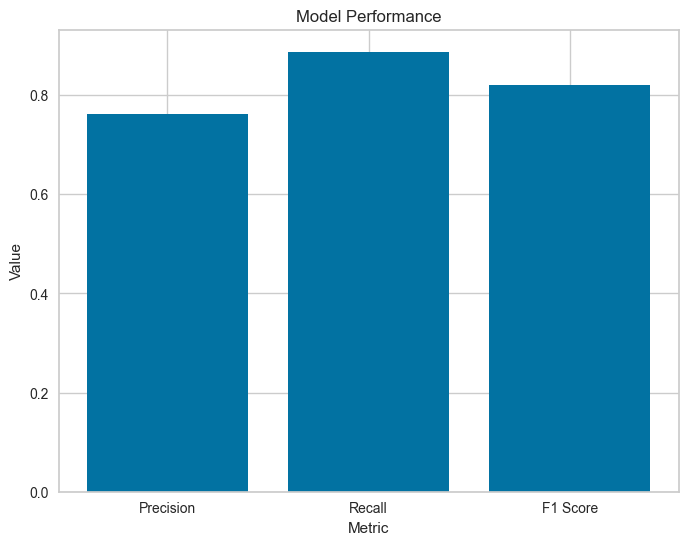

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Plot the precision, recall, and F1 score
plt.figure(figsize=(8,6))
plt.bar(['Precision', 'Recall', 'F1 Score'], [precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance')
plt.show()


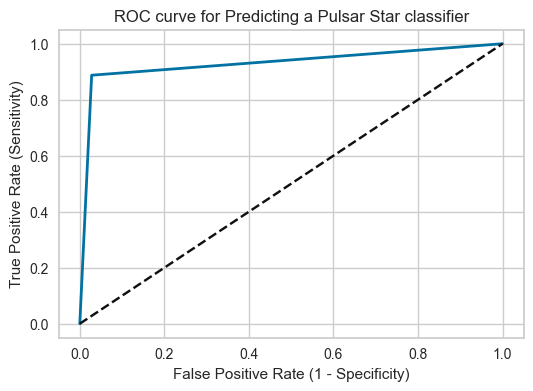

In [126]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()